<div class="image">
    <img style="float: right;" src="https://miro.medium.com/max/15000/1*hAMUkRqnWVn4fxTjCNJP1w.jpeg" width="40%" align="right">
     <h4>
          <p style="font-size:32pt"> Credit Card Risk Prediction </p>
         <br>
          <p style="font-size:20pt; color: #1d76b9">MSIN0097 
              Individual Coursework </p>
     </h4>
</div>


<h3>Table of Content</h3>

* [1. Introduction](#1.-Introduction)
* [2. Data Attributes](#2.-Data-Attributes)
* [3. Exploring the Data](#3.-Exploring-the-Data)
* [4. Preparing the Data](#4.-Preparing-the-Data)
    * [4.1 Exploring Null Values](#4.1-Exploring-Null-Values)
    * [4.2 Removing Duplicates](#4.2-Removing-Duplicates)
    * [4.3 Target Feature / Label](#4.3-Target-Feature-/-Label)
    * [4.4 Feature Engineering](#4.4-Feature-Engineering)
* [5. Visualising the Data](#5.-Visualising-the-Data)
    * [5.1 Income](#5.1-Income)
    * [5.2 Income Type](#5.2-Income-Type)
    * [5.3 Occupation](#5.3-Occupation)
    * [5.4 Education](#5.4-Education)
    * [5.5 Marital Status](#5.5-Marital-Status)
    * [5.6 Housing](#5.6-Housing)
    * [5.7 Property](#5.7-Property)
    * [5.8 Years Employed](#5.8-Years-Employed)
    * [5.9 Risk Distribution](#5.9-Risk-Distribution)
* [6. Prepare the Data for Machine Learning Model](#6.-Prepare-the-Data-for-Machine-Learning-Model)
    * [6.1 Transforming Outliers](#6.1-Transforming-Outliers)
    * [6.2 Transforming Skewed Continuous Features](#6.2-Transforming-Skewed-Continuous-Features )
    * [6.3 Label Encoding Categorical Features](#6.3-Label-Encoding-Categorical-Features)
    * [6.4 Splitting Data into Train and Test](#6.4-Splitting-Data-into-Train-and-Test)
    * [6.5 Normalising Numerical Features](#6.5-Normalising-Numerical-Features)
    * [6.6 Handling Class Imbalance](#6.6-Handling-Class-Imbalance)
* [7. Select and train a model](#7.-Select-and-train-a-model)
    * [7.1 Models Preliminary Evaluation](#7.1-Models-Preliminary-Evaluation)
    * [7.2 Cross Validation](#7.2-Cross-Validation)
* [8. Fine-tuning the models](#8.-Fine-tuning-the-models)
    * [8.1 Parameter Tuning for Decision Tree](#8.1-Parameter-Tuning-for-Decision-Tree)
    * [8.2 Parameter Tuning for Random Forest](#8.2-Parameter-Tuning-for-Random-Forest)
    * [8.3 Parameter Tuning for XGBoost](#8.3-Parameter-Tuning-for-XGBoost)
* [9. Summary Conclusions](#9.-Summary-Conclusions)
* [10. References](#10.-References)


In [207]:
# !pip install seaborn
# !pip install names
# !pip install pandas-profiling
# !pip install heatmap
# !pip install xgboost
#!pip install imblearn
#!pip install heatmapz

In [208]:
#Importing Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling as ppf
import warnings # This library will be used to ignore some warnings
import itertools
from collections import Counter # To do counter of some features
from heatmap import heatmap, corrplot
from time import time

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.offline as py
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
from plotly.offline import init_notebook_mode, iplot
import plotly.tools as tls # It's useful to we get some tools of plotly


# models to be compared
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from imblearn.over_sampling import SMOTE


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score,accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
from sklearn.metrics import classification_report

plt.style.use('fivethirtyeight')

# Importing relevant modules
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%autosave 120

Autosaving every 120 seconds


In [209]:
#Defintions of functions that is used in this notebook frequently
import helperfunctions as func

In [314]:
# Displaying the word count
import io
from nbformat import current
def nb_word_count(nb_path):
    with io.open(nb_path, 'r', encoding='utf-8') as f:
        nb = current.read(f, 'json')
        word_count = 0
        for cell in nb.worksheets[0].cells:
            if cell.cell_type == "markdown":
                word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
    return word_count
nb_word_count('./Main-Copy1.ipynb') #with the Appendix and References

2425

# 1. Introduction

The Financial Industry has been utilizing data analytics in various use cases including fraud detection, credit scoring and customer segmentation.

One of these use cases is assessing the risk of a client’s default while issuing credit cards. This notebook will explore different classification models to classify the customers based on their credit history and the personal data.

**Objective** : Build a predictive model to predict if an applicant is a 'low' or 'high' risk.

**Challenges:** 
- No label for risky customers.
- Imbalanced labels. 


## 2. Data Attributes


**Application record**

|**Variable**   |  **Description**  |
|:---| :---|
| **`1.ID`** | Client ID |
| **`2.CODE_GENDER`** | **`(M is male and F is female)`** - Gender of the applicant.|
| **`3.FLAG_OWN_CAR`** | **`(Y is Yes and N is NO)`** -  Is there a car?|
| **`4- FLAG_OWN_REALTY`** | **`(Y is Yes and N is NO)`** - Is there a property.|
| **`5- CNT_CHILDREN`** | Number of children |
| **`6- AMT_INCOME_TOTAL:`** | Annual income |
| **`7- NAME_INCOME_TYPE:`** |  **`(5 Types)`** -Income category|
| **`8- NAME_EDUCATION_TYPE:`** | **`(5 Types)`** - Education level |
| **`9- NAME_FAMILY_STATUS:`** | **`(6 Types)`** - Marital status |
| **`10- NAME_HOUSING_TYPE :`** | **`(?? Types)`** - Way of living |
| **`11- DAYS_BIRTH :`** | **`(Negative Value)`** - The number of the days from birth |
| **`12- DAYS_EMPLOYED :`** | **`(Negative Value)`** - The number of the days from employed |
| **`13- FLAG_MOBIL :`** | **`( 1 is True and 0 is False.)`** - Is there a mobile phone |
| **`14- FLAG_PHONE :`** | **`( 1 is True and 0 is False.)`** -  Is there a phone |
 | **`15- FLAG_EMAIL: :`** | **`( 1 is True and 0 is False.)`** - Is there an email |
 | **`16- OCCUPATION_TYPE:`** | **`(19 Types)`** - The type of occupation |
 | **`18- CNT_FAM_MEMBERS`** | Family size |

**Credit record**

|**Variable**   |  **Description**  |
|:---| :---|
| **`1.ID`** | Client ID |
| **`2.MONTHS_BALANCE`** |0 is the current month, -1 is the previous month, and so on|
| **`3.STATUS`** |Credit status for this month.|
 |       |             X: No loan for the month 
 |       |            -C: paid off that month 
 |       |            - 0: 1-29 days past due 
 |       |            - 1: 30-59 days past due 
 |       |            - 2: 60-89 days overdue
 |       |            - 3: 90-119 days overdue 
 |       |            - 4: 120-149 days overdue 
 |       |            - 5: Overdue or bad debts, write-offs for more than 150 days | 
 


- The datasetis extracted from Kaggle on  March 1st, 2021, https://www.kaggle.com/rikdifos/credit-card-approval-prediction

In [211]:
#Extracting data
df_app= pd.read_csv("application_record.csv")
df_credit = pd.read_csv("credit_record.csv")

In [212]:
df_app.head()
print("The applidations dataset has {} records.".format(df_app.shape[0]))

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

The applidations dataset has 438557 records.


In [213]:
#Checking the features types!
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [214]:
df_credit.head()
print("The credit dataset has {} records.".format(df_credit.shape[0]))

ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C

The credit dataset has 1048575 records.


In [215]:
#Checking the features types!
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


- The datasets have a mixture of numerical and categorical features. This will require preprocessing later on to prepare for the machine learning models.
- OCCUPATION_TYPE in the application record have null values to be explored. 

# 4. Preparing the Data

## 4.1 Exploring Null Values

In [216]:
df_app.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

OCCUPATION_TYPE null values will be replaced with 'NA' till further analysis of the dataset to explore potential imputations.

In [217]:
#replace the nan values with 'NA'
df_app = df_app.fillna('NA')

In [218]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


##  4.2 Removing Duplicates

In [219]:
#How many Unique IDs in Applications and Customer Records: 
print('There are '+str(df_app['ID'].nunique()) +' unique applicanion IDs out of '+str(df_app.shape[0]))

There are 438510 unique applicanion IDs out of 438557


Duplicated entries in the application records are assumed to a mistake and the last entry will be kept. 

In [220]:
df_app= df_app.drop_duplicates(subset=['ID'], keep='last')

In [221]:
df_app.shape  #check the shape of the dataframe after removing duplicates

(438510, 18)

In [222]:
print('There are '+ str(df_credit['ID'].nunique()) +' unique credit recrods IDs out ' + str(df_credit.shape[0]))

There are 45985 unique credit recrods IDs out 1048575


It is expected to have multiple entries as they are updated per customer every month.

## 4.3 Target Feature / Label

In [223]:
#Check how many customers we have in each status
df_credit['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

Credit records will be used to analyze the customer's performance window. Labels of 'High Risk' or 'Low Risk' will be given to identify risky customers.

1- The credit record have 2 status that can be counted as one:
 - X: No loan for the month
 - C: paid off that month 
Replace STATUS with -1.

2- Create pivot table to count the number of times a customer has fallen in each status, this will be used to flag customers who fall into a risky STATUS more often.

3- Create TENURE: Number of months as a bank customer, this feature could be beneficial in predicting risk. 

4- Check if the loan already terminated by checking Month 0 "Current" status, if latest (max) MONTHS_BALANCE < 0, then the loan must have been paid off or no loan (Status that was just created)

In [224]:
# loan paid / not existing is set as -1
df_credit.STATUS = df_credit.STATUS.replace(['C','X'], -1).astype('int8')

# pivot by status
df_pivot = (df_credit.pivot_table(values='MONTHS_BALANCE', index='ID', columns='STATUS', aggfunc='count')
          .fillna(0)
          .assign(TENURE=lambda x: x.sum(axis=1)).reset_index())

#create coloumn name:
df_pivot.columns.name = ''
df_pivot.columns = ['STATUS_'+str(i) if i not in ['ID', 'TENURE'] else i for i in df_pivot.columns]

# Check if the loan already terminated by checking Current Month 0 status
# if latest (max) MONTHS_BALANCE < 0, then loan must have ended
df_credit = (df_credit.groupby(['ID'], as_index=False)['MONTHS_BALANCE'].max()
            .assign(LOAN_TERMINATED = lambda x: x.MONTHS_BALANCE<0)[['ID', 'LOAN_TERMINATED']].astype('int')
            .merge(df_pivot, how='inner', on='ID'))
del df_pivot

df_credit.head(10)

ID  LOAN_TERMINATED  STATUS_-1  STATUS_0  STATUS_1  STATUS_2  \
0  5001711                0        1.0       3.0       0.0       0.0   
1  5001712                0        9.0      10.0       0.0       0.0   
2  5001713                0       22.0       0.0       0.0       0.0   
3  5001714                0       15.0       0.0       0.0       0.0   
4  5001715                0       60.0       0.0       0.0       0.0   
5  5001717                0        5.0      17.0       0.0       0.0   
6  5001718                0       13.0      24.0       2.0       0.0   
7  5001719                0       41.0       2.0       0.0       0.0   
8  5001720                0        0.0      29.0       7.0       0.0   
9  5001723                0       23.0       8.0       0.0       0.0   

   STATUS_3  STATUS_4  STATUS_5  TENURE  
0       0.0       0.0       0.0     4.0  
1       0.0       0.0       0.0    19.0  
2       0.0       0.0       0.0    22.0  
3       0.0       0.0       0.0    15.0  
4       0.0       0.0       0.0    60.0  
5       0.0       0.0       0.0    22.0  
6       0.0       0.0       0.0    39.0  
7       0.0       0.0       0.0    43.0  
8       0.0       0.0       0.0    36.0  
9       0.0       0.0       0.0    31.0

####  How often does  the customer fall into each status?


In [225]:
# Precentage of each status the customers had fallen into during tenure with the bank 
df_credit_norm = df_credit.copy()
for i in df_credit_norm.columns:
    if 'STATUS' in i:
        df_credit_norm[i] = df_credit_norm[i] / df_credit_norm['TENURE']

#checking in total the mean of each status 
df_credit_norm.describe()

ID  LOAN_TERMINATED     STATUS_-1      STATUS_0  \
count  4.598500e+04     45985.000000  45985.000000  45985.000000   
mean   5.070164e+06         0.263760      0.524158      0.461294   
std    4.543364e+04         0.440675      0.354110      0.348038   
min    5.001711e+06         0.000000      0.000000      0.000000   
25%    5.026147e+06         0.000000      0.166667      0.148148   
50%    5.065737e+06         0.000000      0.571429      0.411765   
75%    5.114024e+06         1.000000      0.844828      0.800000   
max    5.150487e+06         1.000000      1.000000      1.000000   

           STATUS_1      STATUS_2      STATUS_3      STATUS_4      STATUS_5  \
count  45985.000000  45985.000000  45985.000000  45985.000000  45985.000000   
mean       0.012238      0.000746      0.000246      0.000177      0.001141   
std        0.049691      0.009089      0.004079      0.003549      0.023285   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      0.400000      0.214286      0.200000      0.947368   

             TENURE  
count  45985.000000  
mean      22.802544  
std       15.492771  
min        1.000000  
25%       10.000000  
50%       19.000000  
75%       34.000000  
max       61.000000

- 52% of all statuses are in -1 i.e. either paid off or no loan 
- 46% are in 0 - which is 1-29 days past due - common status 
- 1.2% are in 1 - which is 30-59 days past due - flagged as risky.
- The rest of the statuses will be flagged as risky.

#### How many customers fall into status bigger than 1 (overdure more than 60 days) ?

In [226]:
# we calculate the %age of statues `>1` normalized by total duration 
risky_cols = ['STATUS_2', 'STATUS_3', 'STATUS_4', 'STATUS_5']

#Check customer who fall in the status 0% (min) to 50% (max) of their tenure time with the bank) 
min_cutoff=0
max_cutoff=50
step=5

df_risk= pd.DataFrame(['False', 'True'], columns=['Risk'])

for i in range(min_cutoff, max_cutoff, step):
    temp= (df_credit_norm.assign(Risk = lambda x: x[risky_cols].apply(sum, axis=1) > (i/100))
         .groupby(['Risk'], as_index=False)['ID'].count()
            )
    df_risk['at '+str(i)+'% cutoff'] = temp['ID'] * 100 / df_credit_norm['ID'].count()

df_risk


Risk  at 0% cutoff  at 5% cutoff  at 10% cutoff  at 15% cutoff  \
0  False     98.549527     99.088833      99.419376      99.565076   
1   True      1.450473      0.911167       0.580624       0.434924   

   at 20% cutoff  at 25% cutoff  at 30% cutoff  at 35% cutoff  at 40% cutoff  \
0      99.665108      99.710775      99.749918      99.784712      99.828205   
1       0.334892       0.289225       0.250082       0.215288       0.171795   

   at 45% cutoff  
0      99.856475  
1       0.143525

- `1.45%` of the customers fall into at least 1 status of `2 or higher` during their history with the bank.  

- For this project, any customer with 2 or higher will be considered riksy at 0% cutoff. 

#### Which fequencey of status 1 can the business tolarate as not risky ? 

In [227]:
concern_cols = ['STATUS_1']
df_risk= pd.DataFrame(['False', 'True'], columns=['Risk'])

for i in range(min_cutoff, max_cutoff, step):
    temp= (df_credit_norm.assign(Risk = lambda x: x[concern_cols].apply(sum, axis=1) > (i/100))
         .groupby(['Risk'], as_index=False)['ID'].count()
            )
    df_risk['at '+str(i)+'% cutoff'] = temp['ID'] * 100 / df_credit_norm['ID'].count()

df_risk


Risk  at 0% cutoff  at 5% cutoff  at 10% cutoff  at 15% cutoff  \
0  False      88.68979     92.795477      96.026965      97.533978   
1   True      11.31021      7.204523       3.973035       2.466022   

   at 20% cutoff  at 25% cutoff  at 30% cutoff  at 35% cutoff  at 40% cutoff  \
0      98.495161      99.051865      99.312819      99.549853      99.693378   
1       1.504839       0.948135       0.687181       0.450147       0.306622   

   at 45% cutoff  
0      99.784712  
1       0.215288

For this project, any customer who 5% of the time is in status 1 or higher will be considered riksy.

In [228]:
STATUS_1_limit = 0.05

#df_credit_norm
df_credit_norm = df_credit_norm.assign(Risk = lambda x: (x.STATUS_1.apply(lambda y: y > STATUS_1_limit) 
                                                   + x[risky_cols].apply(sum, axis=1) > 0
                                                  ).astype('int8')
                            )
df_credit_norm.head(2)

df_credit_norm['Risk'].value_counts(normalize=True)

ID  LOAN_TERMINATED  STATUS_-1  STATUS_0  STATUS_1  STATUS_2  \
0  5001711                0   0.250000  0.750000       0.0       0.0   
1  5001712                0   0.473684  0.526316       0.0       0.0   

   STATUS_3  STATUS_4  STATUS_5  TENURE  Risk  
0       0.0       0.0       0.0     4.0     0  
1       0.0       0.0       0.0    19.0     0

0    0.920257
1    0.079743
Name: Risk, dtype: float64

#### Conclusion:
Customer who `5% of the time` fall in `status 1` and at least in any of the statuses of `2 or higher` during their history with the bank will be considered risky.

##  4.4 Feature Engineering 

### Join Tables 

In [229]:
#For the purpose of this project, We will look at the customers with credit record with the bank. 
#How many customer with credit records do we have?
print("The number of customers with records in the bank is " + str(len(set(df_app["ID"]).intersection(set(df_credit_norm["ID"])))))# checking to see how many records match in two datasets

The number of customers with records in the bank is 36457


In [230]:
#since we have 36457 customers in both tables, we will perform an inner join  with their Risk and Tenure in the bank
df = df_app.join(df_credit_norm[['ID', 'Risk','TENURE']].set_index('ID'), on='ID', how='inner')
df.head()


ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0              NA   
1           1                1           0           0              NA   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  Risk  TENURE  
0              2.0     1    16.0  
1              2.0     1    15.0  
2              2.0     0    30.0  
3              1.0     0     5.0  
4              1.0     0     5.0

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 434812
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null

### Remove Unnecessary features 

In [232]:
#Everyone has a mobile phone, let's check values to verfiy
df[ "FLAG_MOBIL" ].value_counts() 

1    36457
Name: FLAG_MOBIL, dtype: int64

FLAG_MOBIL has only a single unique value, it will be dropped.

#### Change DAYS_BIRTH to Age and DAYS_EMPLOYED to Years_Employed

In [233]:
# Convert DAYS_BIRTH to age (in years) - and round it up to one decimal place
df['Age'] = (df['DAYS_BIRTH'] * -1 / 365).round(1)

# Convert DAYS_EMPLOYED to Years_Employed- and round it up to one decimal place
df['Is_Unemployed'] = (df['DAYS_EMPLOYED'] > 0).astype('int8') #create new feature to flag unemployed
df.loc[df.DAYS_EMPLOYED > 0, 'DAYS_EMPLOYED'] = 0 #DAYS_EMPLOYED > 0 means currently unemployed
df['Years_Employed'] = (df['DAYS_EMPLOYED'] * -1 / 365).round(1)

df['AMT_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL'].apply(lambda x: x/1000)

#FLAG_MOBIL has only a single unique value, it is not adding value so we will drop it
df =  df.drop(columns=['FLAG_MOBIL', 'DAYS_BIRTH', 'DAYS_EMPLOYED'])

### Rename Features

In [234]:
df.rename(columns={'CODE_GENDER':'Gender','FLAG_OWN_CAR':'Car','FLAG_OWN_REALTY':'Property',
                         'CNT_CHILDREN':'Childern','AMT_INCOME_TOTAL':'Income',
                         'NAME_EDUCATION_TYPE':'Education','NAME_FAMILY_STATUS':'Marital_Status',
                        'NAME_HOUSING_TYPE':'Housing','FLAG_EMAIL':'Email',
                         'NAME_INCOME_TYPE':'Income_Type','FLAG_WORK_PHONE':'Work_Phone',
                         'FLAG_PHONE':'Phone','CNT_FAM_MEMBERS':'family_Size',
                        'OCCUPATION_TYPE':'Occupation'
                        },inplace=True)
df.head()

ID Gender Car Property  Childern  Income           Income_Type  \
0  5008804      M   Y        Y         0   427.5               Working   
1  5008805      M   Y        Y         0   427.5               Working   
2  5008806      M   Y        Y         0   112.5               Working   
3  5008808      F   N        Y         0   270.0  Commercial associate   
4  5008809      F   N        Y         0   270.0  Commercial associate   

                       Education        Marital_Status            Housing  \
0               Higher education        Civil marriage   Rented apartment   
1               Higher education        Civil marriage   Rented apartment   
2  Secondary / secondary special               Married  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   Work_Phone  Phone  Email      Occupation  family_Size  Risk  TENURE   Age  \
0           1      0      0              NA          2.0     1    16.0  32.9   
1           1      0      0              NA          2.0     1    15.0  32.9   
2           0      0      0  Security staff          2.0     0    30.0  58.8   
3           0      1      1     Sales staff          1.0     0     5.0  52.4   
4           0      1      1     Sales staff          1.0     0     5.0  52.4   

   Is_Unemployed  Years_Employed  
0              0            12.4  
1              0            12.4  
2              0             3.1  
3              0             8.4  
4              0             8.4

#### Investigate  Is_Unemployed & Occupation to impute Null Values

In [235]:
(df.groupby(['Is_Unemployed','Occupation'], as_index=False)
   .agg({'ID':'count', 'Risk':'mean'})
   .sort_values(by=['Risk'], ascending=False)
)

Is_Unemployed             Occupation    ID      Risk
7               0               IT staff    60  0.150000
9               0     Low-skill Laborers   175  0.137143
5               0               HR staff    85  0.117647
17              0         Security staff   592  0.109797
18              0   Waiters/barmen staff   174  0.097701
10              0               Managers  3012  0.096614
3               0             Core staff  3591  0.095238
2               0          Cooking staff   655  0.094656
6               0  High skill tech staff  1383  0.092552
11              0         Medicine staff  1207  0.091135
14              0          Realty agents    79  0.088608
4               0                Drivers  2138  0.087933
8               0               Laborers  6211  0.086299
16              0            Secretaries   151  0.086093
1               0         Cleaning staff   551  0.085299
15              0            Sales staff  3485  0.080631
12              0                     NA  5188  0.079029
0               0            Accountants  1241  0.074940
19              1                     NA  6135  0.071394
13              0  Private service staff   344  0.052326


- All Unemployed have NA as their occupation, remove Is_Unemployed feature and replace the NA with Unemployed
- IT staff, Low-skill Laborers	and HR staff have the highest risk.

In [236]:
#replace the NA in for Occupation with Unemployed
df.loc[df.Is_Unemployed == 1, 'Occupation'] = 'Unemployed'
#Drop Is_Unemployed 
df = df.drop(columns=['Is_Unemployed'])

#### Checking the remaining NAs in Occupation by Income type

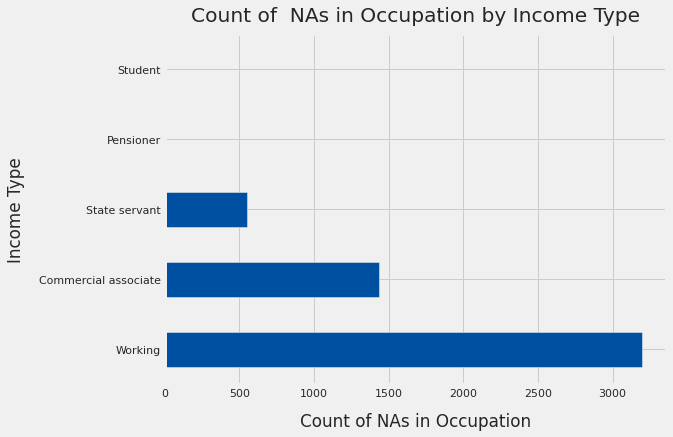

In [237]:
df.loc[df.Occupation== "NA","Income_Type"].value_counts().plot(kind='barh',figsize=(8, 6), color="#0050A1")
plt.xlabel("Count of NAs in Occupation", labelpad=14)
plt.ylabel("Income Type", labelpad=14)
plt.title("Count of  NAs in Occupation by Income Type", y=1.02);

In [238]:
#replace the NA in for Occupation with Income Type, leaving working as it is vaguely defined
df.loc[df["Income_Type"]== "State servant", 'Occupation'] = 'State servant'
df.loc[df["Income_Type"]== "Commerical associare", 'Occupation'] = 'Commerical associare"'
df.loc[df["Income_Type"]== "Sudent", 'Occupation'] = 'Student'
df.loc[df["Income_Type"]== "Pensioner", 'Occupation'] = "Pensioner"

In [239]:
df["Occupation"].value_counts()

Pensioner                6152
Laborers                 6016
NA                       4636
Sales staff              3473
State servant            2985
Managers                 2707
Core staff               2686
Drivers                  2018
High skill tech staff    1183
Accountants              1148
Medicine staff            806
Cooking staff             592
Security staff            571
Cleaning staff            532
Private service staff     324
Low-skill Laborers        171
Waiters/barmen staff      130
Secretaries               116
HR staff                   82
Realty agents              79
IT staff                   50
Name: Occupation, dtype: int64

Number of NAs has been reducded, Occupation could be an important feature. The null values will be kept. 

# 5. Visualising the Data

## 5.1 Income

In [240]:
trace0 = go.Box(
    y=df.loc[df['Risk'] == 1]['Income'],
    name = 'High Risk',
    marker = dict(
        color = "#A10000",
    )
)
trace1 = go.Box(
    y=df.loc[df['Risk'] == 0]['Income'],
    name = 'Low Risk',
    marker = dict(
        color = '#0050A1',
    )
)
data = [trace0, trace1]
layout = go.Layout(
    title = "Boxplot of Income by Risk"
)

fig = go.Figure(data=data,layout=layout)
py.iplot(fig)


In [241]:
df.groupby('Risk')['Income'].describe()

count        mean         std   min    25%    50%    75%     max
Risk                                                                    
0     33368.0  186.232501  100.229341  27.0  121.5  157.5  225.0  1575.0
1      3089.0  191.581683  117.231636  27.0  121.5  162.0  225.0  1575.0

The impact of income alone on risk is not strong. 

## 5.2 Income Type

In [242]:
# 1st plot
trace0 = go.Bar(
x = df[df["Risk"]== 0]["Income_Type"].value_counts().index.values,
y = df[df["Risk"]== 0]["Income_Type"].value_counts().values,
    name='Low Risk',
     marker = dict(
        color = "#0050A1")
)
#2nd plot
trace1 = go.Bar(
x = df[df["Risk"]== 1]["Income_Type"].value_counts().index.values,
y = df[df["Risk"]== 1]["Income_Type"].value_counts().values,
name= 'High Risk',
    marker = dict(
        color = "#A10000")
)

data = [trace0, trace1]

layout = go.Layout(
title= "Income_Type"
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename="Income_Type-Grouped")

In [243]:
def sort_by_risk(x): 
    return (df.groupby(x, as_index=False)
              .agg({'ID':'count', 'Risk':'mean'})
              .sort_values(by=['Risk'], ascending=False)
           )
sort_by_risk(['Income_Type'])

Income_Type     ID      Risk
0  Commercial associate   8490  0.094346
3               Student     11  0.090909
2         State servant   2985  0.090787
4               Working  18819  0.082948
1             Pensioner   6152  0.073960

Working has the highest count but Commercial associate & Student have higher chances of being risky. 

## 5.3 Occupation

In [244]:
# 1st plot
trace0 = go.Bar(
x = df[df["Risk"]== 0]["Occupation"].value_counts().index.values,
y = df[df["Risk"]== 0]["Occupation"].value_counts().values,
name='Low Risk',
    marker = dict(
        color = "#0050A1")
)
#2nd plot
trace1 = go.Bar(
x = df[df["Risk"]== 1]["Occupation"].value_counts().index.values,
y = df[df["Risk"]== 1]["Occupation"].value_counts().values,
name= 'High Risk',
 marker = dict(
        color = "#A10000")
)

data = [trace0, trace1]

layout = go.Layout(
title= "Risky by Occupation"
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename="Occupation-Grouped")

In [245]:
sort_by_risk(['Occupation'])

Occupation    ID      Risk
7                IT staff    50  0.180000
9      Low-skill Laborers   171  0.134503
20   Waiters/barmen staff   130  0.123077
5                HR staff    82  0.121951
18         Security staff   571  0.106830
10               Managers  2707  0.099741
2           Cooking staff   592  0.096284
6   High skill tech staff  1183  0.092984
4                 Drivers  2018  0.091675
19          State servant  2985  0.090787
3              Core staff  2686  0.089724
15          Realty agents    79  0.088608
11         Medicine staff   806  0.086849
8                Laborers  6016  0.085273
1          Cleaning staff   532  0.084586
16            Sales staff  3473  0.080910
17            Secretaries   116  0.077586
12                     NA  4636  0.077437
13              Pensioner  6152  0.073960
0             Accountants  1148  0.068815
14  Private service staff   324  0.055556

Laborers has the highest count but IT staff,Low-skill Laborers and Waiters/barmen staff have higher chances of being risky. 

## 5.4 Education

In [246]:
# 1st plot
trace0 = go.Bar(
x = df[df["Risk"]== 0]["Education"].value_counts().index.values,
y = df[df["Risk"]== 0]["Education"].value_counts().values,
name='Low Risk',
    marker = dict(
        color = "#0050A1")
)
#2nd plot
trace1 = go.Bar(
x = df[df["Risk"]== 1]["Education"].value_counts().index.values,
y = df[df["Risk"]== 1]["Education"].value_counts().values,
name= 'High Risk',
 marker = dict(
        color = "#A10000")
)

data = [trace0, trace1]

layout = go.Layout(
title= "Risky by Education"
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename="Education-Grouped")

In [247]:
sort_by_risk(['Education'])

Education     ID      Risk
2              Incomplete higher   1410  0.105674
3                Lower secondary    374  0.090909
4  Secondary / secondary special  24777  0.084070
1               Higher education   9864  0.083232
0                Academic degree     32  0.062500

Secondary has the highest count but Incomplete higher & Lower secondary have higher chances of being risky. 

## 5.5 Marital Status

In [248]:
# 1st plot
trace0 = go.Bar(
x = df[df["Risk"]== 0]["Marital_Status"].value_counts().index.values,
y = df[df["Risk"]== 0]["Marital_Status"].value_counts().values,
name='Low Risk',
    marker = dict(
        color = "#0050A1")
)
#2nd plot
trace1 = go.Bar(
x = df[df["Risk"]== 1]["Marital_Status"].value_counts().index.values,
y = df[df["Risk"]== 1]["Marital_Status"].value_counts().values,
name= 'High Risk',
 marker = dict(
        color = "#A10000")
)

data = [trace0, trace1]

layout = go.Layout(
title= "Risky by 'Marital Status'"
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename="'Marital_Status'-Grouped")

In [249]:
sort_by_risk(['Marital_Status'])

Marital_Status     ID      Risk
0        Civil marriage   2945  0.097114
3  Single / not married   4829  0.096086
1               Married  25048  0.082561
2             Separated   2103  0.078459
4                 Widow   1532  0.069191

Married has the highest count but Civil marriage & Single / not married have higher chances of being risky. 

## 5.6 Housing

In [250]:
# 1st plot
trace0 = go.Bar(
x = df[df["Risk"]== 0]["Housing"].value_counts().index.values,
y = df[df["Risk"]== 0]["Housing"].value_counts().values,
name='Low Risk', 
    marker = dict(
        color = "#0050A1")

)
#2nd plot
trace1 = go.Bar(
x = df[df["Risk"]== 1]["Housing"].value_counts().index.values,
y = df[df["Risk"]== 1]["Housing"].value_counts().values,
name= 'High Risk',
 marker = dict(
        color = "#A10000")
)

data = [trace0, trace1]

layout = go.Layout(
title= "Risky by 'Housing'"
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename="'Housing-Grouped")

In [251]:
sort_by_risk(['Housing'])

Housing     ID      Risk
3     Office apartment    262  0.118321
2  Municipal apartment   1128  0.099291
5         With parents   1776  0.097973
4     Rented apartment    575  0.092174
1    House / apartment  32548  0.083323
0      Co-op apartment    168  0.041667

House/ apartment has the highest count but Office apartment	& Municipal apartment have higher chances of being risky.

## 5.7 Property

In [252]:
# 1st plot
trace0 = go.Bar(
x = df[df["Risk"]== 0]["Property"].value_counts().index.values,
y = df[df["Risk"]== 0]["Property"].value_counts().values,
name='Low Risk',
    marker = dict(
        color = "#0050A1")
)
#2nd plot
trace1 = go.Bar(
x = df[df["Risk"]== 1]["Property"].value_counts().index.values,
y = df[df["Risk"]== 1]["Property"].value_counts().values,
name= 'High Risk',
 marker = dict(
        color = "#A10000")
)

data = [trace0, trace1]

layout = go.Layout(
title= "Risky by Property"
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename="Property-Grouped")

In [253]:
sort_by_risk(['Property'])

Property     ID      Risk
0        N  11951  0.095808
1        Y  24506  0.079328

With Property has the highest count but Without Property has a higher chances of being risky. 

## 5.8 Years Employed

In [254]:
trace0 = go.Box(
    y=df.loc[df['Risk'] == 0]['Years_Employed'],
    name = 'Low risk',
   marker = dict(
        color = "#0050A1")

)
trace1 = go.Box(
    y=df.loc[df['Risk'] == 1]['Years_Employed'],
    name = 'High Risk',
 marker = dict(
        color = "#A10000")
)
data = [trace0, trace1]
layout = go.Layout(
    title = "Boxplot of Years Employed by Risk"
)

fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [255]:
df.groupby('Risk')['Years_Employed'].describe()

count      mean       std  min  25%  50%  75%   max
Risk                                                       
0     33368.0  6.037140  6.501136  0.0  1.1  4.3  8.6  43.0
1      3089.0  5.928941  6.299475  0.0  1.4  4.0  8.6  40.5

Longer years of Employement has a higher chances of being good customers. 

## 5.9 Age

In [256]:
trace0 = go.Box(
    y=df.loc[df['Risk'] == 0]['Age'],
    name = 'Low Risk',
    marker = dict(
        color = "#0050A1")
)
trace1 = go.Box(
    y=df.loc[df['Risk'] == 1]['Age'],
    name = 'High Risk',
    marker = dict(
        color = "#A10000")
)
data = [trace0, trace1]
layout = go.Layout(
    title = "Boxplot of Age by Risk"
)

fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [257]:
df.groupby('Risk')['Age'].describe()

count       mean        std   min   25%   50%   75%   max
Risk                                                             
0     33368.0  43.903518  11.490831  20.5  34.4  42.8  53.4  68.9
1      3089.0  42.303108  11.598483  21.1  32.2  40.9  51.8  68.0

Older Customers have a higher chances of being good customers. 

## 5.10 Risk Distribution

In [258]:
df["Risk"].value_counts(normalize=True) 

0    0.91527
1    0.08473
Name: Risk, dtype: float64

In [259]:
# it's a library that we work with plotly

trace0 = go.Bar(
            x = df[df["Risk"]== 0]["Risk"].value_counts().index.values,
            y = df[df["Risk"]== 0]["Risk"].value_counts().values,
            name='Low Risk',
    marker = dict(
        color = "#0050A1")
    )

trace1 = go.Bar(
            x = df[df["Risk"]== 1]["Risk"].value_counts().index.values,
            y = df[df["Risk"]== 1]["Risk"].value_counts().values,
            name='High Risk',
    marker = dict(
        color = "#A10000")
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

Oversampling with imbalanced data, need to be addressed 

 ## 5.11Numerical features Pair plot

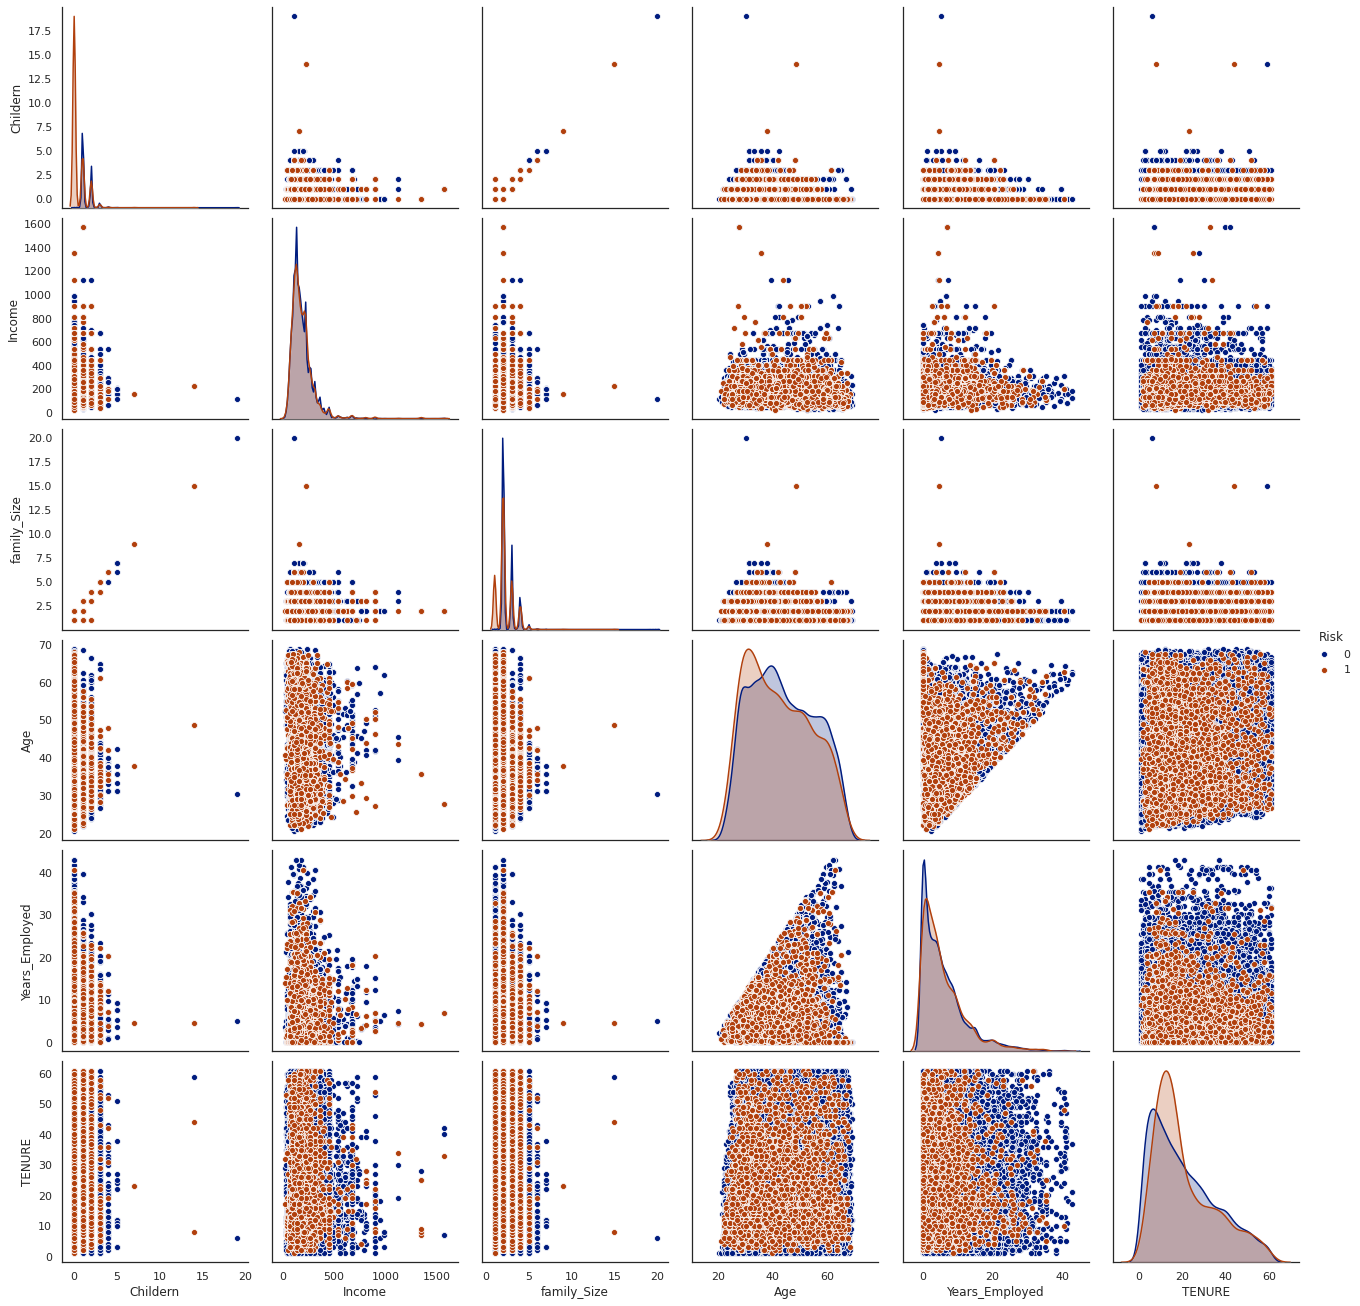

In [293]:
#Numerical features by label, with orange representing 1 or low risk and blue representing 1 or high risk customers.
cols = ['Childern', 'Income', "family_Size", 'Age','Years_Employed', 'TENURE', "Risk"]
sns.set(style="ticks", color_codes=True);
sns.set_style('white') 
sns.pairplot(df[cols], hue='Risk', height = 3, palette="dark")
sns.set()


From the pairplot, the distributions of features differ by label

# 6. Prepare the Data for Machine Learning Model

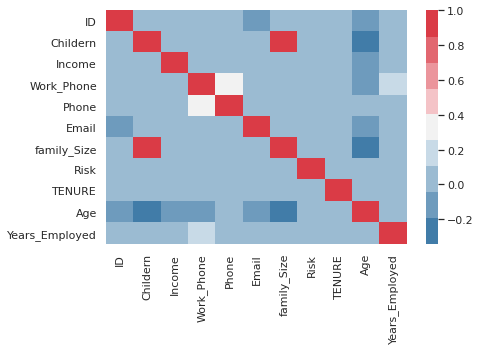

In [283]:
#Correlation of numberical variables
corr = df.corr()
cmap = sns.diverging_palette(240, 10, n=9)
#corrplot(corr, size_scale=300)
sns.heatmap(corr, cmap=cmap)

Since family size include the count of childern, they are correlated. 
Age and Childern are correlated and that is expected.

In [262]:
df.corr()['Risk'].sort_values()

Age              -0.038727
Years_Employed   -0.004647
Phone            -0.004035
TENURE            0.002016
Work_Phone        0.004560
family_Size       0.005508
ID                0.007545
Childern          0.007796
Email             0.014079
Income            0.014635
Risk              1.000000
Name: Risk, dtype: float64

Age and Years_Employed are negatively correlcated with Risk. 

## 6.1 Transforming  Outliers

### 6.1.1 Numerical Features Distribution

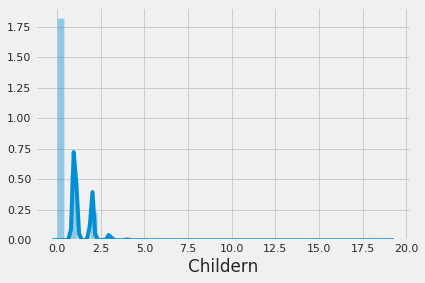

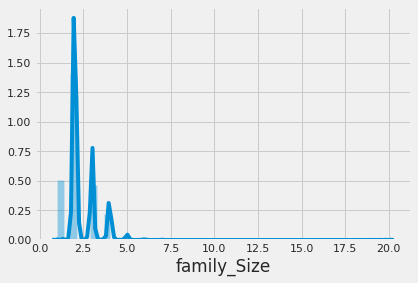

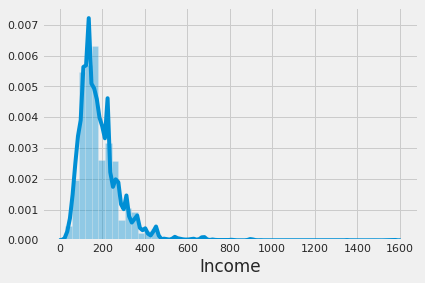

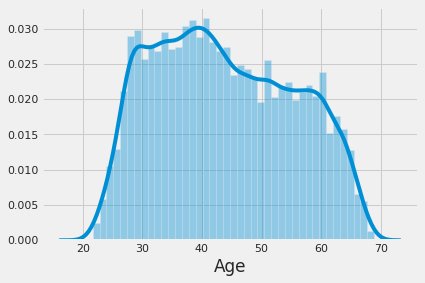

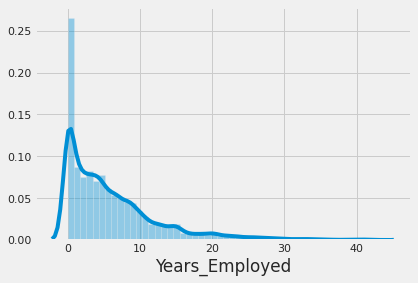

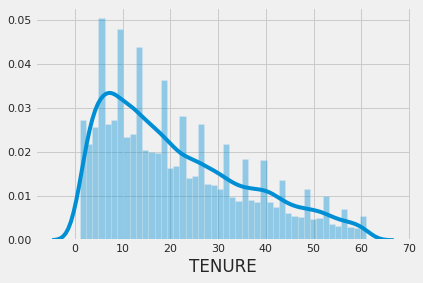

In [263]:

# Reset style 
plt.style.use('fivethirtyeight')
#defintion of plotDistPlot in the helper functions file
func.plotDistPlot(df['Childern'])
func.plotDistPlot(df['family_Size'])
func.plotDistPlot(df['Income'])
func.plotDistPlot(df['Age'])
func.plotDistPlot(df['Years_Employed'])
func.plotDistPlot(df['TENURE'])


Childern, Family Size, Income, Years Employed and Tenure have a skewed distrubtion.

### 6.1.2 Numerical Features & Risk Distribution

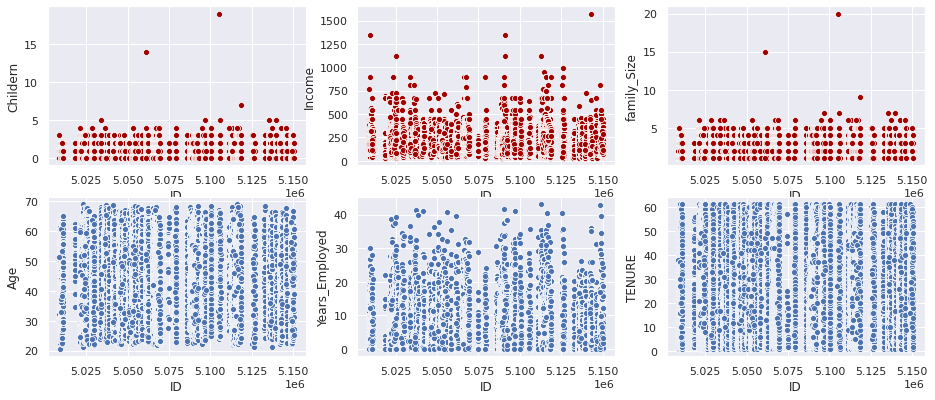

In [206]:
#relationships and outliers 
numcols = ['Childern','Income', 'family_Size','Age','Years_Employed', 'TENURE']
fig, ax= plt.subplots(nrows= 2, ncols = 3, figsize= (14,6))
sns.scatterplot(x='ID', y='Childern', data=df, ax=ax[0][0], color= "#A10000")
sns.scatterplot(x='ID', y='Income', data=df, ax=ax[0][1], color="#A10000")
sns.scatterplot(x='ID', y='family_Size', data=df, ax=ax[0][2],color="#A10000")
sns.scatterplot(x='ID', y='Age', data=df, ax=ax[1][0])
sns.scatterplot(x='ID', y='Years_Employed', data=df, ax=ax[1][1])
sns.scatterplot(x='ID', y='TENURE', data=df, ax=ax[1][2])

There are some outliers in :  Childern, Income and Family Size 

### 6.1.3 Removing Outliers with Interquantiles

Using IQR,replace the outliers with a NULL value.

In [59]:
# - Calculate the first and third quartile (Q1 and Q3).
# - Evaluate the interquartile range, IQR = Q3-Q1.
# - Estimate the lower bound = Q1*1.5
# - Estimate the upper bound = Q3*1.5
# - Replace the data points that lie outside of the lower and the upper bound with a NULL value.
#defention of remove_outliers is in the helper functions file
for col in numcols:
        df = func.remove_outliers(df, col)  #remove outliers funcition in the helper functions file
        
for i in numcols:
    df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

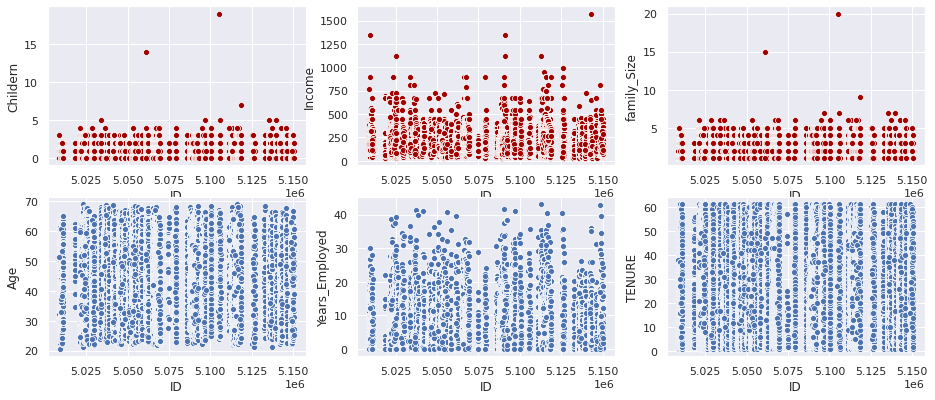

In [205]:
## Reviewing the relationships and outliers 
numcols = ['Childern','Income', 'family_Size','Age','Years_Employed', 'TENURE']
fig, ax= plt.subplots(nrows= 2, ncols = 3, figsize= (14,6))
sns.scatterplot(x='ID', y='Childern', data=df, ax=ax[0][0], color= '#A10000')
sns.scatterplot(x='ID', y='Income', data=df, ax=ax[0][1], color='#A10000')
sns.scatterplot(x='ID', y='family_Size', data=df, ax=ax[0][2],color= '#A10000')
sns.scatterplot(x='ID', y='Age', data=df, ax=ax[1][0])
sns.scatterplot(x='ID', y='Years_Employed', data=df, ax=ax[1][1])
sns.scatterplot(x='ID', y='TENURE', data=df, ax=ax[1][2])



####  Reviewing Numerical Features Distribution 

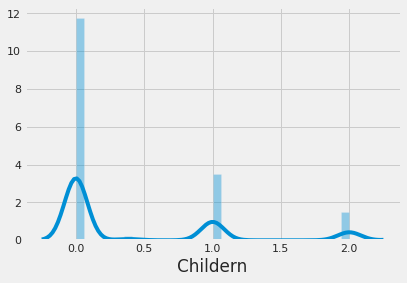

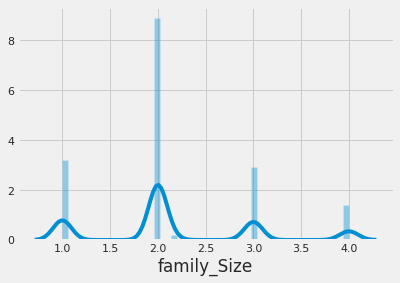

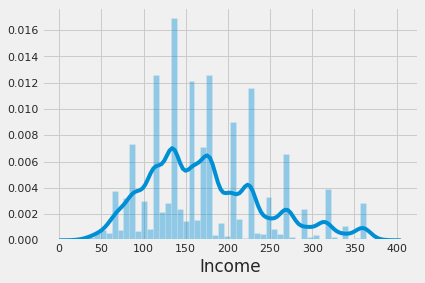

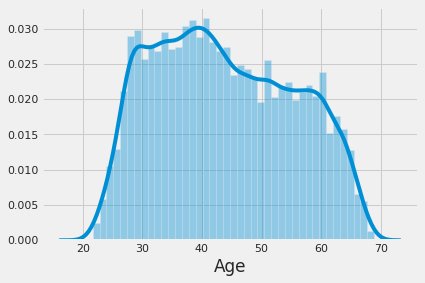

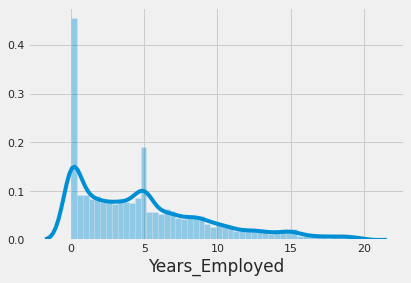

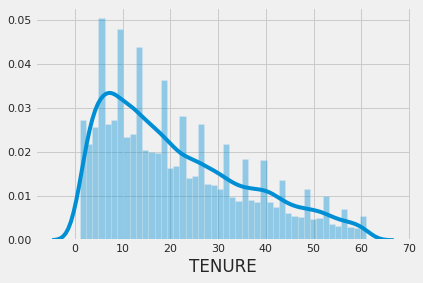

In [61]:
#defintion of plotDistPlot in the helper functions file
func.plotDistPlot(df['Childern'])
func.plotDistPlot(df['family_Size'])
func.plotDistPlot(df['Income'])
func.plotDistPlot(df['Age'])
func.plotDistPlot(df['Years_Employed'])
func.plotDistPlot(df['TENURE'])

Tenure and Years Employed are still skewed

## 6.2 Transforming Skewed Continuous Features 

In [62]:
#Standard functions used for such conversions include Normalization, the Sigmoid, Log, Cube Root and the Hyperbolic Tangent. 
#sqrt is used below. 
before = df['Years_Employed'].skew()
after = np.sqrt(df['Years_Employed']).skew()
print('Years_Employed ------')
print(f'Bef ore: {before}')
print(f'After:  {after}')

before = df['TENURE'].skew()
after = np.sqrt(df['TENURE']).skew()
print('TENURE ------')
print(f'Before: {before}')
print(f'After:  {after}')

Years_Employed ------
Bef ore: 0.9795911203338689
After:  -0.1310069924832117
TENURE ------
Before: 0.7300502695119323
After:  0.13515804512138369


In [63]:
#def transform_skewed_data(application):
x = df.copy()
df.loc[:,'Years_Employed'] = np.sqrt(x['Years_Employed'])
df.loc[:,'TENURE'] = np.sqrt(x['TENURE'])

#### Reviewing Numerical Features Distribution

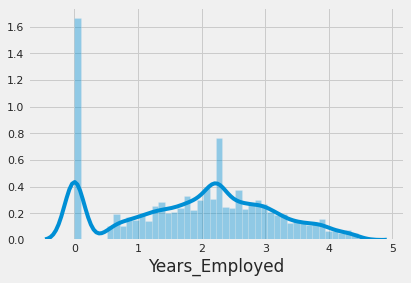

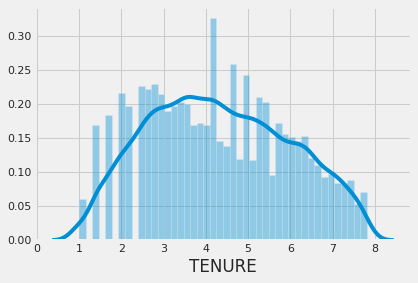

In [64]:
func.plotDistPlot(df['Years_Employed'])
func.plotDistPlot(df['TENURE'])

The distrbution isn't skewed. 

## 6.3 Label Encoding Categorical Features 

In [65]:
#Encoding Categorical features 
le = LabelEncoder()
for x in df:
    if df[x].dtypes=='object'or'category':
        df[x] = le.fit_transform(df[x])

## 6.4 Splitting Data into Train and Test

In [66]:
df=df.drop('ID', axis = 1)
Features = df.drop('Risk', axis = 1)# X value contains all the variables except labels
Label = df['Risk']  # these are the labels

In [67]:
print("The dataset has {} features.".format(Features.shape[1]))
print("The dataset has {} enteries.".format(Features.shape[0]))

The dataset has 17 features.
The dataset has 36457 enteries.


In [68]:
X_train, X_test, y_train, y_test = train_test_split(Features,Label, test_size=0.3,random_state=100)
print("Training set has {} samples.".format(X_train.shape[0])) 
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 25519 samples.
Testing set has 10938 samples.


## 6.5 Normalising Numerical Features

To ensures the equal treatment of each feature when supervised models are applied.
Robust Scaler shrinks data to medians and quantiles, thus not influenced by outliers. 

In [69]:
scaler = RobustScaler()
#-Fit the scaler using available training data.
X_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
#Apply the scale to training data.
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_scaled.head()

Gender  Car  Property  Childern    Income  Income_Type  Education  \
0     1.0  0.0       0.0       0.0  0.000000          0.0        0.0   
1     0.0  0.0       0.0       0.0 -0.524390          0.0        0.0   
2     1.0  0.0       0.0       0.0 -0.707317          0.0        0.0   
3     0.0  1.0       0.0       1.5 -0.195122          0.0        0.0   
4     1.0  0.0       0.0       0.0 -0.548780          0.0        0.0   

   Marital_Status  Housing  Work_Phone  Phone  Email  Occupation  family_Size  \
0             0.0      0.0         0.0    0.0    1.0        -0.8          0.0   
1             0.0      0.0         0.0    0.0    0.0         0.0          0.0   
2             0.0      0.0         0.0    0.0    0.0        -0.8          0.0   
3             0.0      0.0         0.0    0.0    0.0        -2.4          1.5   
4             0.0      0.0         1.0    1.0    0.0        -0.8          0.0   

     TENURE       Age  Years_Employed  
0 -0.590909 -0.857895        0.615385  
1  0.363636  1.126316       -0.461538  
2 -0.636364 -0.273684        1.815385  
3 -0.681818 -0.315789       -0.092308  
4 -0.409091  0.063158        0.123077

## 6.6 Handling Class Imbalance

Using Synthetic Minority Oversampling (SMOTE) technique to handle class imbalance, it will increase the number of less presented cases in a dataset.

In [70]:
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)

In [71]:
y_train.value_counts()
y_balanced.value_counts()

0    23363
1     2156
Name: Risk, dtype: int64

1    23363
0    23363
Name: Risk, dtype: int64

In [72]:
y_test.value_counts()
y_test_balanced.value_counts()

0    10005
1      933
Name: Risk, dtype: int64

1    10005
0    10005
Name: Risk, dtype: int64

# 7. Select and train a model 

### Model’s Performance Evaluation

For classification problems that are skewed in their classification, accuracy isnt the preferred metric. Instead, precision and recall are much more representative.

These two metrics are combined in the F1 score, which is weighted average of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score. 

F1-score and AUC will be used in evaluating the models. 

Models that will be used: 
- LogisticRegression
- KNeighborsClassifier
- Support Vector Machines (SVC)
- DecisionTreeClassifie
- RandomForestClassifier
- XGBClassifier

## 7.1 Models Preliminary Evaluation 

In [315]:
random_state = 42
n_est = 100  #The number of trees in th Random & XGBoost forest

classifiers = {
  "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(random_state=random_state),
    "DecisionTree" : DecisionTreeClassifier(random_state=random_state),
    "RandomForest" : RandomForestClassifier(n_estimators = n_est,random_state=random_state),
    "XGBoost" : XGBClassifier(n_estimators = n_est,eval_metric="aucpr",random_state=random_state, use_label_encoder =False)
}


In [74]:
clf_score = []
for key, classifier in classifiers.items():
    classifier.fit(X_balanced, y_balanced)
    train_fscore = round(f1_score(y_balanced, classifier.predict(X_balanced),average='weighted')*100,4)
    test_fscore = round(f1_score(y_test_balanced, classifier.predict(X_test_balanced),average='weighted')*100,4)
    clf_score.append([classifier.__class__.__name__, train_fscore, test_fscore])

LogisticRegression()

KNeighborsClassifier()

SVC(random_state=42)

DecisionTreeClassifier(random_state=42)

RandomForestClassifier(random_state=42)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='aucpr',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

                        train_score  test_score
classifier                                     
XGBClassifier               95.8667     92.7138
DecisionTreeClassifier      99.5634     87.9027
RandomForestClassifier      99.5634     85.2777
SVC                         80.1649     70.0757
KNeighborsClassifier        93.4264     68.8420
LogisticRegression          54.9638     54.3115


Text(0.5, 0, 'Classifier')

Text(0, 0.5, 'Fscore in Percentage')

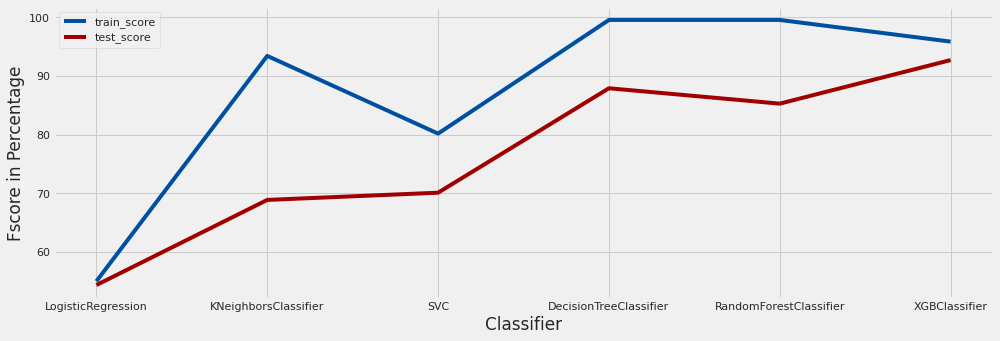

In [135]:
df_result = pd.DataFrame(clf_score,columns=['classifier','train_score','test_score'])
df_result.set_index(['classifier'], inplace=True)
print(df_result.sort_values(['test_score', 'train_score'],ascending = [False, False]))
df_result.plot(kind='line', figsize=(15,5), color=["#0050A1","#A10000"])
plt.xlabel("Classifier")
plt.ylabel("Fscore in Percentage")


The best fscores on test and train data is for the XGBClassifier, DecisionTreeClassifier and RandomForestClassifier. 

## 7.2 Cross Validation 

To double check previous findings and flag problems like overfitting, Cross validation is used.

In [77]:
# evaluate each model in turn
results = []
names = []
scoring = 'f1_weighted'

for name, model in classifiers.items():
    # With imbalanced class distributions, StratifiedKFold is recommended. 
        Skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42 ) #KFold Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds
        cv_results = cross_val_score(model, X_balanced, y_balanced, cv=Skfold, scoring=scoring) #cv:cross-validation splitting strategy
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)


LogisticRegression: 0.548800 (0.005555)
KNeighbors: 0.877369 (0.002839)
SVC: 0.778851 (0.003887)
DecisionTree: 0.918181 (0.002535)
RandomForest: 0.953384 (0.002085)
XGBoost: 0.951252 (0.002686)


In [78]:
cv_score = []
fone_scorer = make_scorer(f1_score, average='weighted')
Skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42 ) #KFold Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds

for name, model in classifiers.items():
    train_fscore = round(cross_val_score(model, X_balanced, y_balanced, scoring=fone_scorer, cv = 3).mean()*100,4)
    test_fscore = round(cross_val_score(model, X_test_balanced, y_test_balanced, scoring=fone_scorer, cv = 3).mean()*100,4)
    cv_score.append([model.__class__.__name__, train_fscore, test_fscore])


                        train_score  test_score
classifier                                     
RandomForestClassifier      95.0269     94.9855
XGBClassifier               94.4108     94.4563
DecisionTreeClassifier      91.2824     89.5727
KNeighborsClassifier        85.9215     83.3024
SVC                         77.0701     78.3067
LogisticRegression          54.8163     54.7284


Text(0.5, 0, 'Classifier')

Text(0, 0.5, 'Fscore in Percentage')

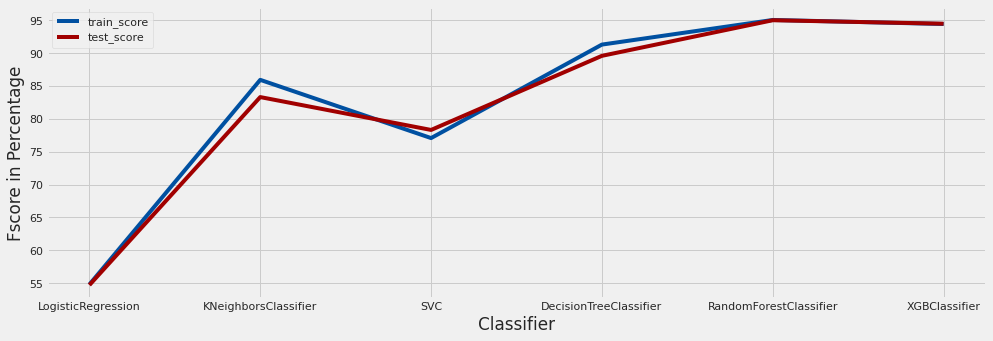

In [134]:
df_cv_result = pd.DataFrame(cv_score,columns=['classifier','train_score','test_score'])
df_cv_result.set_index(['classifier'], inplace=True)
print(df_cv_result.sort_values(['test_score', 'train_score'],ascending = [False, False]))
df_cv_result.plot(kind='line', figsize=(15,5), color=["#0050A1","#A10000"])
plt.xlabel("Classifier")
plt.ylabel("Fscore in Percentage")

Best Performing Classifers based on the preliminary evaluation and cross validation  resutls are : 
- DecisionTree
- RandomForest 
- XGBoost

## 8. Fine-tuning the models

## 8.1 Parameter Tuning for Decision Tree

### 8.1.1 Grid Search

Based on a study on hyperparameter tuning of decision trees [1], min_samples_split and min_samples_leaf have the highest impact on the performance of the final trees.
The ideal min_samples_split values fall between 1 to 40[1]. The ideal min_samples_leaf values tend to be between 1 to 20 for the CART algorithm. Reference to a  [1].

Performing a grid search optimization by tunning parameters like min_samples_split and min_samples_leaf to improve the model’s score.

In [ ]:
# Create the parameters dictionary list of the parameters in which GridSearchCV have to select the best.
DTclf = DecisionTreeClassifier(random_state = 42)

parameters =  {
    'max_depth' : range(5,60,5),  # max_depth. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data
    'min_samples_leaf' : range(1,20,1), #min_samples_leaf is The minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.
    'min_samples_split' : range(1,40,1), #min_samples_split represents the minimum number of samples required to split an internal node, Here we will vary the parameter from 10% to 100% of the samples
    'max_features': range(2,10,1)    #The number of features to consider when looking for the best split:
                         }

scorers = {  # evaluating metric for the model performance to decide the best hyperparameters
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'fone_scorer' : make_scorer(f1_score, average='weighted'),
    'accuracy_score': make_scorer(accuracy_score)
    }

#cv : number of splits that is needed for cross validation. By default is set as five.
# n_jobs : number of jobs to be run in parallel, -1 signifies to use all processor.

grid_search = GridSearchCV(DTclf, parameters, scoring=scorers,refit='recall_score',
                           cv=3, return_train_score=True, n_jobs=-1)

grid_search.fit(X_balanced, y_balanced)

# make the predictions
y_pred = grid_search.predict(X_test_balanced)

In [94]:
# Get the estimator
best_clf = grid_search.best_estimator_
print('\n Best params for Recall score')
print("\n The best estimator across ALL searched params:\n",grid_search.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_search.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)

# Make predictions using the unoptimized and model
predictions = (DTclf.fit(X_balanced, y_balanced)).predict(X_test_balanced)

# Make predictions using the optimized and model
best_predictions = best_clf.predict(X_test_balanced)


 Best params for Recall score

 The best estimator across ALL searched params:
 DecisionTreeClassifier(max_depth=30, max_features=9, random_state=42)

 The best score across ALL searched params:
 0.8990728514794047

 The best parameters across ALL searched params:
 {'max_depth': 30, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [120]:
# Report the before-and-afterscores
print("Unoptimized Decision Tree model \n------")
print(classification_report(y_test_balanced,predictions))
# # print("Accuracy score on testing data {:.4f}".format(accuracy_score( y_test_balanced, predictions)))
# # print("Recall score on testing data: {:.4f}".format(f1_score(y_test_balanced, predictions)))
# # print("F1 score on testing data: {:.4f}".format(recall_score(y_test_balanced, predictions)))

print("\n Optimized Decision Tree Model \n------")
print(classification_report(y_test_balanced,best_predictions))
# print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score( y_test_balanced, best_predictions)))
# print("Final Recall score on the testing data: {:.4f}".format(f1_score(y_test_balanced, best_predictions)))
# print("Final F1 score on testing data: {:.4f}".format(recall_score(y_test_balanced, predictions)))


DTbase_fscore=f1_score(y_test_balanced, predictions)
DTbest_fscore=f1_score(y_test_balanced, best_predictions)

print('Improvement of {:0.2f}%. in the F1 Score'.format( 100 * (DTbest_fscore - DTbase_fscore) / DTbase_fscore))


Unoptimized Decision Tree model 
------
              precision    recall  f1-score   support

           0       0.82      0.92      0.87     10005
           1       0.91      0.80      0.85     10005

    accuracy                           0.86     20010
   macro avg       0.87      0.86      0.86     20010
weighted avg       0.87      0.86      0.86     20010


 Optimized Decision Tree Model 
------
              precision    recall  f1-score   support

           0       0.73      0.91      0.81     10005
           1       0.88      0.67      0.76     10005

    accuracy                           0.79     20010
   macro avg       0.81      0.79      0.79     20010
weighted avg       0.81      0.79      0.79     20010

Improvement of -10.99%. in the F1 Score


<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curves')


 ROC Score of Unoptimized Decision Tree model 0.9428285857071464

 ROC Score of Optimized Decision Tree model 0.7891554222888555


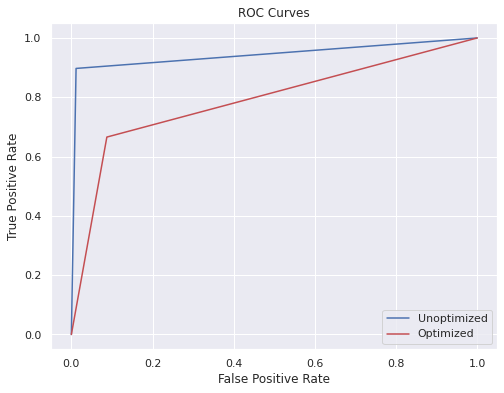

In [332]:
plt.figure(figsize = (8, 6))
plt.rcParams['font.size'] = 16
basefpr, basetpr, _ = roc_curve(y_test_balanced,predictions)
newfpr, newtpr, _ = roc_curve(y_test_balanced,best_predictions)
    
# Plot both curves
plt.plot(basefpr, basetpr, 'b', label = 'Unoptimized')
plt.plot(newfpr, newtpr, 'r', label = 'Optimized')
plt.legend();
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');


print('\n ROC Score of Unoptimized Decision Tree model ' + str(roc_auc_score(y_test_balanced, predictions)))

print('\n ROC Score of Optimized Decision Tree model ' + str(roc_auc_score(y_test_balanced, best_predictions)))



In [86]:
# confusion matrix on Unoptimized .
print('\nConfusion matrix Unoptimized for recall score on the test data:\n------')
sns.set_style('white') 
class_names = ['0','1']
func.plot_confusion_matrix(confusion_matrix(y_test_balanced, predictions),
                      classes= class_names, normalize = True, 
                      title='Unoptimized Decision Tree')
plt.show()



# confusion matrix on Optimized .
print('\nConfusion matrix optimized for recall score on the test data:\n------')
sns.set_style('white') 
class_names = ['0','1']
func.plot_confusion_matrix(confusion_matrix(y_test_balanced, best_predictions),
                      classes= class_names, normalize = True, 
                      title='Optimized Decision Tree')
plt.show()



Confusion matrix Unoptimized for recall score on the test data:
------


NameError: name 'predictions' is not defined

No Improvement was made while optimizing the Decision Tree

### 8.1.2  Feature Importance

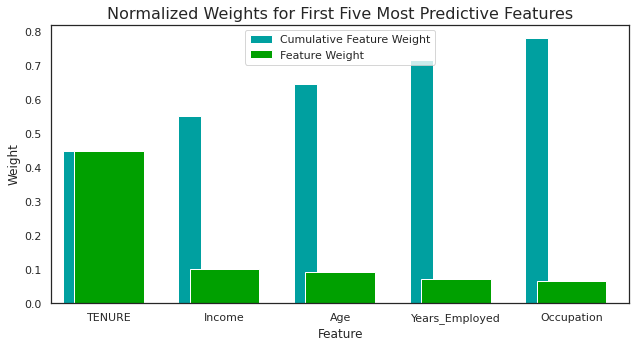

In [107]:
# Extract the feature importances using .feature_importances_ 
importances = DTModel.feature_importances_

# Plot
func.feature_plot(importances, X_balanced, y_balanced)

Tenure and Income have the highest feature weight importance in the decision tree model 

## 8.2 Parameter Tuning for Random Forest

### 8.2.1 RandomizedSearchCV

Optimize Random Forest Model using Randomized Search CV. 
- First define a grid of hyperparameter ranges, and 
- randomly sample from the grid. 

The benefit of a random search is that it is not trying every combination like Grid Search, but it selects at random the sample from the given range of values.

In [80]:
#Adjusting the following set of hyperparameters to sample from during fitting:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 30)] # Number of trees in random forest
#fine tuning the number of trees is unnecessary, simply set the number of trees to a large, computationally feasable number and you’re good to go.
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 10)] # Maximum number of levels in tree
#fine tuning the tree depth is unnecessary, pick a reasonable value and carry on with other hyperparameters.
min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False] # Method of selecting samples for training (with or without replacement)


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion' : ['gini','entropy'],  #Gini or Entropy for a classification task
               'bootstrap': bootstrap}


#model
random_state = 42
n_est = 100 #number of trees in the foreset
## Model
rfclf = RandomForestClassifier(n_estimators = n_est,random_state=random_state)
#rfclf = RandomForestClassifier(random_state=random_state)
n_folds = 3  #cv : number of splits that is needed for cross validation. By default is set as five.
num_iter = 100  #the number of different combinations to try
#More iterations will cover a wider search space and  more cv folds reduces the chances of overfitting, but raising each will increase the run time.
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rfclf, param_distributions = random_grid, n_iter = num_iter, cv = n_folds, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_balanced, y_balanced)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 21, 32, 43, 54, 65,
                                                      76, 87, 98, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 106, 113, 120,
                                                         127, 134, 141, 148,
                                                         155, 162, 168, 175,
                                                         182, 189, 196, 203,
                                                         210, 21

In [81]:
# Get the estimator
best_rfclf = rf_random.best_estimator_
print("\n The best estimator across ALL searched params:\n",rf_random.best_estimator_)
print("\n The best score across ALL searched params:\n",rf_random.best_score_)
print("\n The best parameters across ALL searched params:\n",rf_random.best_params_)

# Make predictions using the unoptimized and model
rfpredictions = (rfclf.fit(X_balanced, y_balanced)).predict(X_test_balanced)
rfbest_predictions = best_rfclf.predict(X_test_balanced)



 The best estimator across ALL searched params:
 RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=98,
                       max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=300, random_state=42)

 The best score across ALL searched params:
 0.9531746334031613

 The best parameters across ALL searched params:
 {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 98, 'criterion': 'entropy', 'bootstrap': False}


In [114]:
# Report the before-and-afterscores
print("Unoptimized Random Forest model\n------")
print(classification_report(y_test_balanced,rfpredictions))
# print("Accuracy score on testing data {:.4f}".format(accuracy_score( y_test_balanced, rfpredictions)))
# print("F score on testing data: {:.4f}".format(f1_score(y_test_balanced, rfpredictions)))



print("\nOptimized Random ForestModel\n------")
print(classification_report(y_test_balanced,rfbest_predictions))
# print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score( y_test_balanced, rfbest_predictions)))
# print("Final F score on the testing data: {:.4f}".format(f1_score(y_test_balanced, rfbest_predictions)))

rfbase_fscore=f1_score(y_test_balanced, rfpredictions)
rfbest_fscore=f1_score(y_test_balanced, rfbest_predictions)

print('Improvement of {:0.2f}%.in f1_score'.format( 100 * (rfbest_fscore - rfbase_fscore) / rfbase_fscore))


Unoptimized model
------
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     10005
           1       0.96      0.74      0.84     10005

    accuracy                           0.85     20010
   macro avg       0.87      0.85      0.85     20010
weighted avg       0.87      0.85      0.85     20010


Optimized Model
------
              precision    recall  f1-score   support

           0       0.80      0.97      0.87     10005
           1       0.96      0.75      0.84     10005

    accuracy                           0.86     20010
   macro avg       0.88      0.86      0.86     20010
weighted avg       0.88      0.86      0.86     20010

Improvement of 1.02%.


<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Random Forest ROC Curves')


 ROC Score of Unoptimized Random Forest model 0.8545727136431784

 ROC Score of Optimized Random Forest model 0.8599200399800101


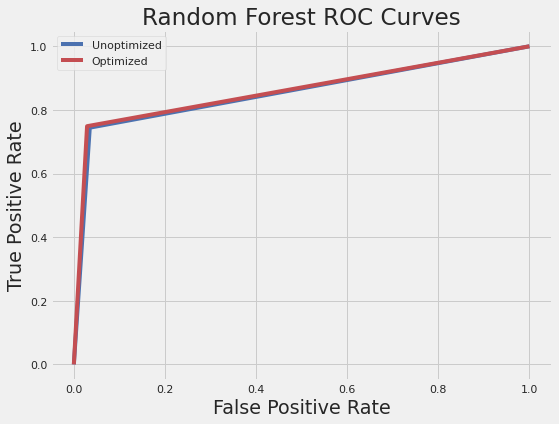

In [115]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8, 6))
plt.rcParams['font.size'] = 16
basefpr, basetpr, _ = roc_curve(y_test_balanced,rfpredictions)
newfpr, newtpr, _ = roc_curve(y_test_balanced,rfbest_predictions)
    
# Plot both curves
plt.plot(basefpr, basetpr, 'b', label = 'Unoptimized')
plt.plot(newfpr, newtpr, 'r', label = 'Optimized')
plt.legend();
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('Random Forest ROC Curves');

print('\n ROC Score of Unoptimized Random Forest model ' + str(roc_auc_score(y_test_balanced, rfpredictions)))

print('\n ROC Score of Optimized Random Forest model ' + str(roc_auc_score(y_test_balanced, rfbest_predictions)))



Confusion matrix Unoptimized for recall score on the test data:
------
[[0.96501749 0.03498251]
 [0.25587206 0.74412794]]


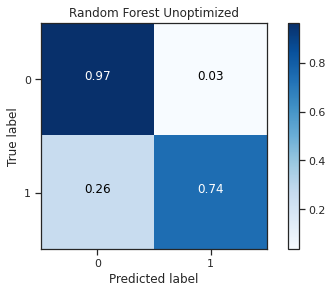


Confusion matrix optimized for recall score on the test data:
------
[[0.97101449 0.02898551]
 [0.25117441 0.74882559]]


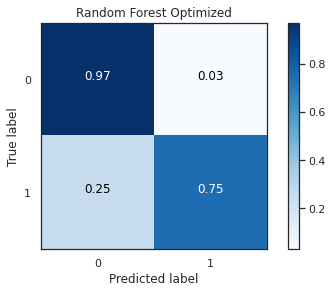

In [116]:
# confusion matrix on the test data.
print('\nConfusion matrix Unoptimized for recall score on the test data:\n------')
sns.set_style("white") 
sns.set(style="ticks", color_codes=True);
class_names = ['0','1']
func.plot_confusion_matrix(confusion_matrix(y_test_balanced, rfpredictions),
                      classes= class_names, normalize = True, 
                      title='Random Forest Unoptimized')
plt.show()

# confusion matrix on the test data.
print('\nConfusion matrix optimized for recall score on the test data:\n------')
sns.set_style("white")
class_names = ['0','1']
func.plot_confusion_matrix(confusion_matrix(y_test_balanced, rfbest_predictions),
                      classes= class_names, normalize = True, 
                      title='Random Forest Optimized')
plt.show()


###  8.2.2  Feature Importance

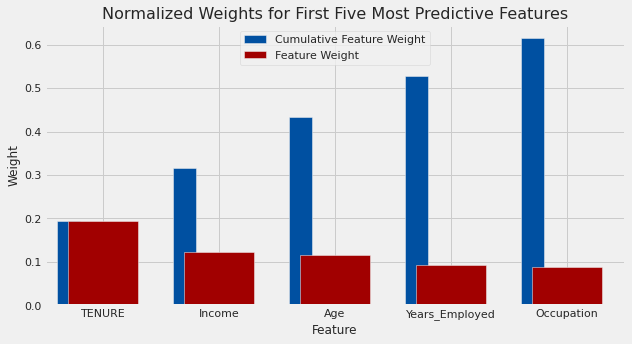

In [133]:
#Plot imporance feature importances using .feature_importances_ 
importancesRF = rfclf.feature_importances_
func.feature_plot(importancesRF, X_balanced, y_balanced)

## 8.3 Parameter Tuning for XGBoost

### 8.3.1 Grid Search

In [201]:
#Fix learning rate and number of estimators for tuning tree-based parameters, 
#tune tree parameters "max_depth'&'min_child_weight

param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
}

random_state = 42
# First create the base model to tune
xgb_clf = XGBClassifier(learning_rate =0.1,
                        n_estimators=1000,
                        max_depth=5,   # This should be between 3-10.
                        min_child_weight=1, # A smaller value is chosen because it is a highly imbalanced class problem and leaf nodes can have smaller size groups.
                        gamma=0,  # A smaller value like 0.1-0.2 can also be chosen for starting. This will anyways be tuned later.
                        subsample=0.8,
                        colsample_bytree=0.8, # This is a commonly used used start value. Typical values range between 0.5-0.9.
                        objective= 'binary:logistic', #Loss function binary: logistic for classification problems and returns predicted probability (not the class)
                        nthread=4,
                        scale_pos_weight=1, # Because of high class imbalance.
                        seed= random_state,
                       # eval_metric="f1_score",
                        use_label_encoder =False)

# Use the random grid to search for best hyperparameters
XG_Grid_search = GridSearchCV(xgb_clf, param_grid=param_test1, scoring='recall', n_jobs=-1, cv=3)

XG_Grid_search.fit(X_balanced, y_balanced)

# make the predictions
xgb_pred = XG_Grid_search.predict(X_test_balanced)


[19:57:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=1000, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=42, subsample=0.8,
                                     tree_method

In [294]:
# Get the estimator
xgbbest_clf = XG_Grid_search.best_estimator_
print("\n The best estimator across ALL searched params:\n",XG_Grid_search.best_estimator_)
print("\n The best score across ALL searched params:\n",XG_Grid_search.best_score_)
print("\n The best parameters across ALL searched params:\n",XG_Grid_search.best_params_)

    # Make predictions using the unoptimized and model
xgbpredictions = (xgb_clf.fit(X_balanced, y_balanced)).predict(X_test_balanced)
xgbbest_predictions = xgbbest_clf.predict(X_test_balanced)


 The best estimator across ALL searched params:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=0.8, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

 The best score across ALL searched params:
 0.9307480221503596

 The best parameters across ALL searched params:
 {'max_depth': 9, 'min_child_weight': 1}
[20:39:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed 

In [295]:
# Report the before-and-afterscores
print("Unoptimized XGBoost model\n------")
print(classification_report(y_test_balanced,xgbpredictions))
# print("Accuracy score on testing data {:.4f}".format(accuracy_score( y_test_balanced, rfpredictions)))
# print("F score on testing data: {:.4f}".format(f1_score(y_test_balanced, rfpredictions)))

print("\nOptimized XGBoost Model\n------")
print(classification_report(y_test_balanced,xgbbest_predictions))
# print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score( y_test_balanced, rfbest_predictions)))
# print("Final F score on the testing data: {:.4f}".format(f1_score(y_test_balanced, rfbest_predictions)))

xgbbase_fscore=f1_score(y_test_balanced, xgbpredictions)
xgbbest_fscore=f1_score(y_test_balanced, xgbbest_predictions)

print('Improvement of {:0.2f}%.in f1_score'.format( 100 * (xgbbest_fscore - xgbbase_fscore) / xgbbase_fscore))


Unoptimized XGBoost model
------
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10005
           1       0.99      0.89      0.94     10005

    accuracy                           0.94     20010
   macro avg       0.94      0.94      0.94     20010
weighted avg       0.94      0.94      0.94     20010


Optimized XGBoost Model
------
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10005
           1       0.97      0.90      0.94     10005

    accuracy                           0.94     20010
   macro avg       0.94      0.94      0.94     20010
weighted avg       0.94      0.94      0.94     20010

Improvement of -0.25%.in f1_score


<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'XGBoost ROC Curves')


 ROC Score of Unoptimized XGBoost model 0.9408795602198899

 ROC Score of Optimized XGBoost model 0.9379810094952524


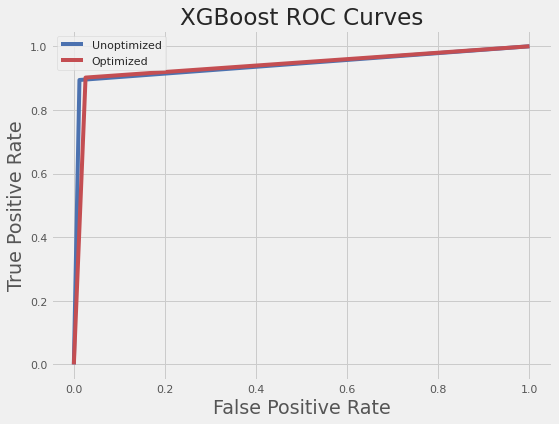

In [303]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8, 6))
plt.rcParams['font.size'] = 16
basefpr, basetpr, _ = roc_curve(y_test_balanced,xgbpredictions)
newfpr, newtpr, _ = roc_curve(y_test_balanced,xgbbest_predictions)
    
# Plot both curves
plt.plot(basefpr, basetpr, 'b', label = 'Unoptimized')
plt.plot(newfpr, newtpr, 'r', label = 'Optimized')
plt.legend();
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('XGBoost ROC Curves');

print('\n ROC Score of Unoptimized XGBoost model ' + str(roc_auc_score(y_test_balanced, xgbpredictions)))

print('\n ROC Score of Optimized XGBoost model ' + str(roc_auc_score(y_test_balanced, xgbbest_predictions)))



Confusion matrix Unoptimized for recall score on the test data:
------
[[0.98770615 0.01229385]
 [0.10594703 0.89405297]]


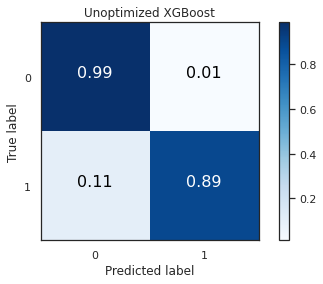


Confusion matrix optimized for recall score on the test data:
------
[[0.97431284 0.02568716]
 [0.09835082 0.90164918]]


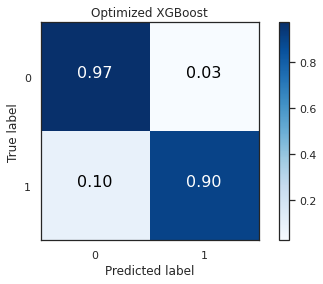

In [298]:
# confusion matrix on the test data.
print('\nConfusion matrix Unoptimized for recall score on the test data:\n------')
sns.set_style('white') 
class_names = ['0','1']
func.plot_confusion_matrix(confusion_matrix(y_test_balanced, xgbpredictions),
                      classes= class_names, normalize = True, 
                      title='Unoptimized XGBoost')
plt.show()

# confusion matrix on the test data.
print('\nConfusion matrix optimized for recall score on the test data:\n------')
sns.set_style('white') 
class_names = ['0','1']
func.plot_confusion_matrix(confusion_matrix(y_test_balanced, xgbbest_predictions),
                      classes= class_names, normalize = True, 
                      title='Optimized XGBoost')
plt.show()


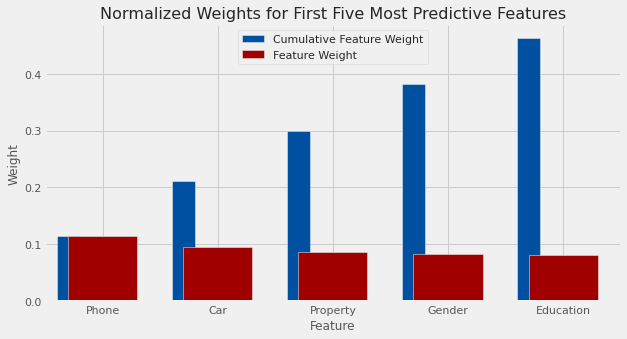

In [307]:
#Plot imporance feature importances using .feature_importances_ 
importancesxgb = xgb_clf.feature_importances_
func.feature_plot(importancesxgb, X_balanced, y_balanced)

In [309]:
feat_labels = df.columns[1:]
importances = xgb_clf.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_balanced.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))  


 1) Phone                          0.115467
 2) Car                            0.095994
 3) Property                       0.087506
 4) Gender                         0.083615
 5) Education                      0.080915
 6) Risk                           0.079129
 7) Email                          0.063927
 8) Work_Phone                     0.063419
 9) family_Size                    0.054275
10) Income                         0.051712
11) Occupation                     0.047243
12) Marital_Status                 0.038001
13) Income_Type                    0.036899
14) Childern                       0.032208
15) Housing                        0.025459
16) Age                            0.022304
17) TENURE                         0.021927


<Figure size 2160x1080 with 0 Axes>

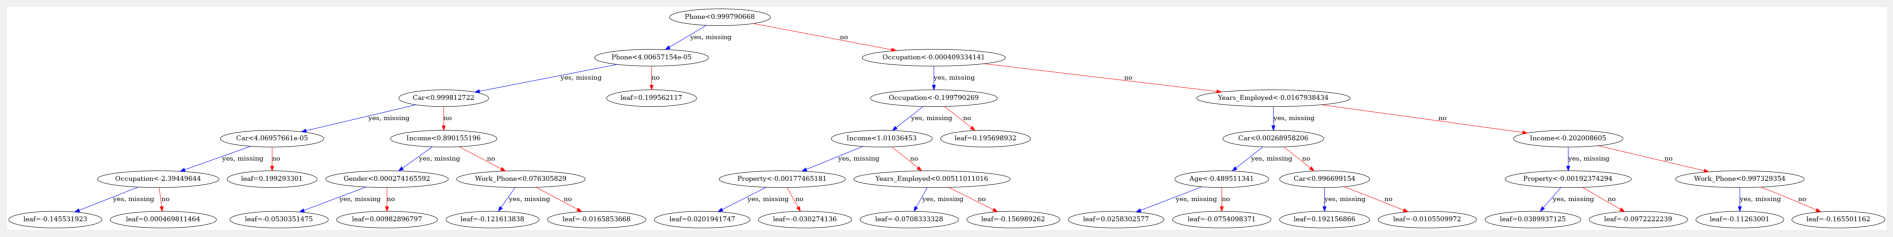

In [310]:
#Plot_tree allows to visualize the trees that were built by XGBoost.
plt.figure(figsize=(30,15)) 
xgb.plot_tree(xgb_clf, ax=plt.gca())

The Unoptimized XGBClassifier is the best performing model with 0.95 F1 score.

## 9. Summary Conclusions

The profile of risky customers was defined by those who their 30-59 days overdue window exeed 5% of their credit history or at any time exceeded the 60 days overdue. Risky customers were a total of 8% of the customers provided in the records.  

Based on the exploratory data analysis:

- Occupation: IT staff, low-skill laborers and waiters/barmen staff have higher chances of being risky customers.
- Martial status: civil marriage & single / not married have higher chances of being Risky Customer
- Education: incomplete higher & lower secondary have higher chances of being Risky Customer

Logistic Regression, KNeighbors, SVC, DecisionTree, RandomForest, and XGBoost were tested by building simple models to pick the best one. Due to class imbalance, accuracy was not the main meaningful metric. AUC and f1 scores were used as the evaluation metrics. 

Decision tree, RandomForest, and XGBoost were the best performing preliminary models. 

After tuning the hyperparameters and comparing their performances. The Unoptimized XGBClassifier is the best performing model.

Further improvements could be done by : 
- Creating pipelines for the data preparation part.
- Creating Age category.
- Handling imbalanced data with RandomUnderSampler.
- Exploring the impact of other scaling techniques.

## 10. References

[1] Rafael Gomes Mantovani, Tomáš Horváth, Ricardo Cerri, Sylvio Barbon Junior, Joaquin Vanschoren, André Carlos Ponce de Leon Ferreira de Carvalho, “An empirical study on hyperparameter tuning of decision trees”
arXiv:1812.02207

[2]Koehrsen, W. (2018). Hyperparameter Tuning the Random Forest in Python. [online] Medium. Available at: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74.

[3] Spark, C. (2019). Hyperparameter tuning in XGBoost. [online] Medium. Available at: https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f.

[4]Analytics Vidhya (2016). Complete Guide to Parameter Tuning in XGBoost (with codes in Python). [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/.

[5]Adi Bronshtein (2017). Train/Test Split and Cross Validation in Python. [online] Towards Data Science. Available at: https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6.

[6]Brownlee, J. (2020). How to Configure XGBoost for Imbalanced Classification. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/xgboost-for-imbalanced-classification/.
